# 1. Data, Visualize, train and test folders

## 1.1 Data from Kaggle

In [1]:
!pip install opendatasets -q

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/fahadullaha/facial-emotion-recognition-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: afreenhossain
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fahadullaha/facial-emotion-recognition-dataset


100%|██████████| 200M/200M [00:00<00:00, 962MB/s] 


In [4]:
data_dir = "/content/facial-emotion-recognition-dataset/processed_data"

In [5]:
import os

print("Structure of our dataset: ")

for dirpath, dirnames, filenames in os.walk(data_dir):

  # print(dirpath)
  # print(dirnames)
  # print(filenames)

  num_dirs = len(dirnames)
  num_files = len(filenames)

  rel_path = os.path.relpath(dirpath, data_dir)
  print(f"{rel_path}/")
  print(f"   ├── {num_dirs} subfolder(s)")
  print(f"   └── {num_files} file(s)\n")

Structure of our dataset: 
./
   ├── 7 subfolder(s)
   └── 0 file(s)

neutral/
   ├── 0 subfolder(s)
   └── 8166 file(s)

angry/
   ├── 0 subfolder(s)
   └── 5920 file(s)

disgust/
   ├── 0 subfolder(s)
   └── 5920 file(s)

sad/
   ├── 0 subfolder(s)
   └── 6535 file(s)

surprise/
   ├── 0 subfolder(s)
   └── 5920 file(s)

fear/
   ├── 0 subfolder(s)
   └── 5920 file(s)

happy/
   ├── 0 subfolder(s)
   └── 11398 file(s)



## 1.2 Visualize random images

In [6]:
import random
import matplotlib.pyplot as plt
import cv2

In [7]:
from genericpath import isdir
def vis_random_images(data_dir, num_images=20, grid_size=(5,5)):
  all_images= []

  for emotion in os.listdir(data_dir):
    emotion_path = os.path.join(data_dir, emotion)
    if os.path.isdir(emotion_path):
      files = [os.path.join(emotion_path, filename) for filename in os.listdir(emotion_path)]
      all_images.extend([(filename, emotion) for filename in files])

  print(f"Length of all images: {len(all_images)}")
  print("all_images[:10]:")
  for item in all_images[:10]:
    print(item)

  random_samples = random.sample(all_images, num_images)

  print("\nrandom_samples[:10]:")
  for item in random_samples[:10]:
    print(item)


  plt.figure(figsize=(12, 12))

  for i, (img_path, emotion) in enumerate(random_samples):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(grid_size[0], grid_size[1], i + 1)
    plt.imshow(img)
    plt.title(emotion, fontsize=10)
    plt.axis('off')

  plt.suptitle(f"Random {num_images} Images from Dataset", fontsize=16)
  plt.tight_layout()
  plt.show()

Length of all images: 49779
all_images[:10]:
('/content/facial-emotion-recognition-dataset/processed_data/neutral/neutral_00316.jpg', 'neutral')
('/content/facial-emotion-recognition-dataset/processed_data/neutral/neutral_06036.jpg', 'neutral')
('/content/facial-emotion-recognition-dataset/processed_data/neutral/neutral_06718.jpg', 'neutral')
('/content/facial-emotion-recognition-dataset/processed_data/neutral/neutral_04058.jpg', 'neutral')
('/content/facial-emotion-recognition-dataset/processed_data/neutral/neutral_04116.jpg', 'neutral')
('/content/facial-emotion-recognition-dataset/processed_data/neutral/neutral_01281.jpg', 'neutral')
('/content/facial-emotion-recognition-dataset/processed_data/neutral/neutral_01969.jpg', 'neutral')
('/content/facial-emotion-recognition-dataset/processed_data/neutral/neutral_02609.jpg', 'neutral')
('/content/facial-emotion-recognition-dataset/processed_data/neutral/neutral_02156.jpg', 'neutral')
('/content/facial-emotion-recognition-dataset/processed

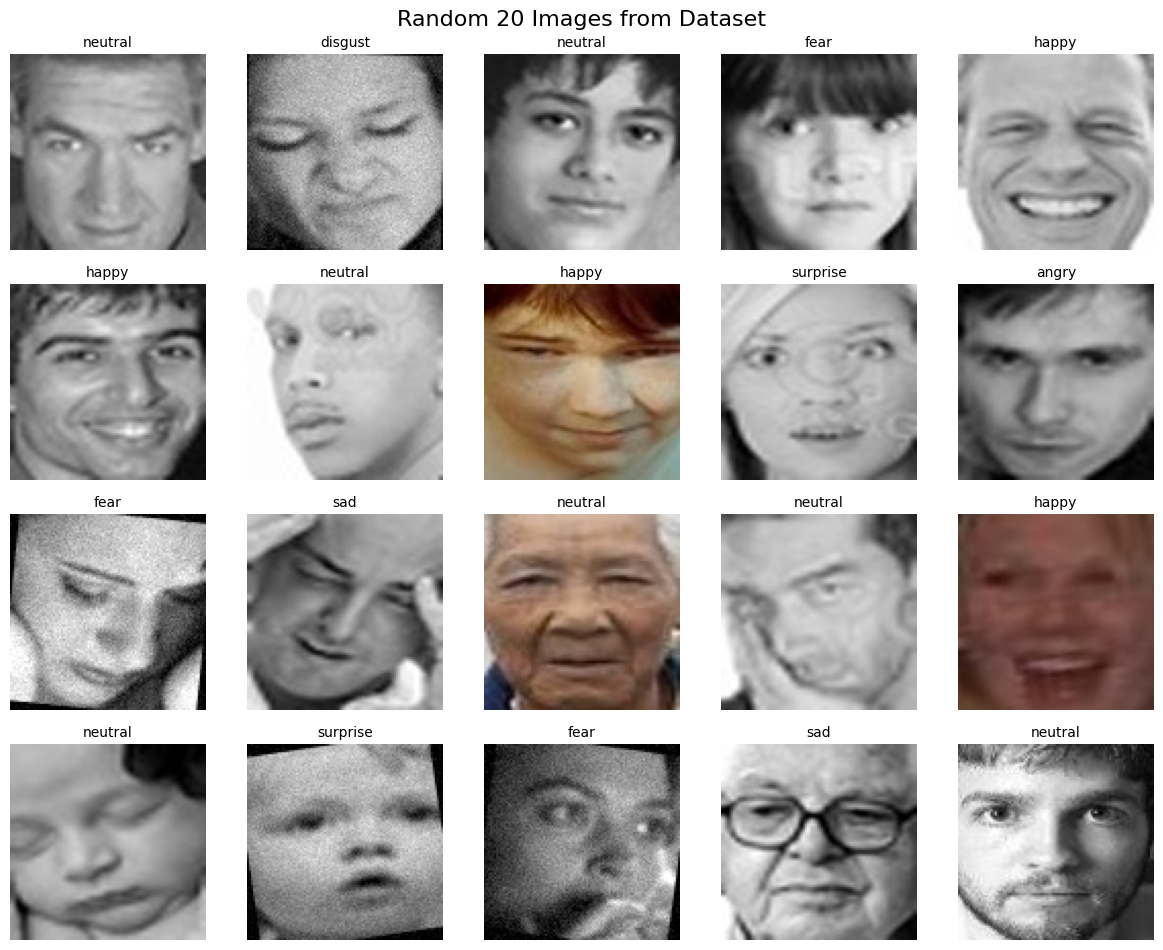

In [8]:
vis_random_images(data_dir)

## 1.3 Make train and test data

Train: 75%

Test: 25%

In [9]:
import shutil
from pathlib import Path

In [10]:
import shutil
from pathlib import Path

def create_train_test_dirs(source_dir, output_dir, train_ratio=0.75, seed=42, copy=True):
  src = Path(source_dir)
  destination = Path(output_dir)
  rng = random.Random(seed)

  train_root = destination / "train"
  test_root = destination / "test"

  train_root.mkdir(parents=True, exist_ok=True)
  test_root.mkdir(parents=True, exist_ok=True)

  for cls_dir in sorted(p for p in src.iterdir() if p.is_dir()):
    cls_name = cls_dir.name
    train_cls = train_root / cls_name
    test_cls = test_root / cls_name

    train_cls.mkdir(exist_ok=True, parents=True)
    test_cls.mkdir(exist_ok=True, parents=True)

    files = [p for p in cls_dir.iterdir() if p.is_file()]
    rng.shuffle(files)

    split_idx = int(len(files) * train_ratio)
    train_files = files[:split_idx]
    test_files  = files[split_idx:]

    for f in train_files:
      dest = train_cls / f.name
      (shutil.copy2 if copy else shutil.move)(str(f), str(dest))

    for f in test_files:
      dest = test_cls / f.name
      (shutil.copy2 if copy else shutil.move)(str(f), str(dest))

    print(f"{cls_name:12s}: total={len(files):5d}  train={len(train_files):5d}  test={len(test_files):5d}")

  return train_root, test_root

In [11]:
source = "/content/facial-emotion-recognition-dataset/processed_data"
output = "/content/facial-emotion-recognition-dataset/data"

train_dir, test_dir = create_train_test_dirs(source, output)

angry       : total= 5920  train= 4440  test= 1480
disgust     : total= 5920  train= 4440  test= 1480
fear        : total= 5920  train= 4440  test= 1480
happy       : total=11398  train= 8548  test= 2850
neutral     : total= 8166  train= 6124  test= 2042
sad         : total= 6535  train= 4901  test= 1634
surprise    : total= 5920  train= 4440  test= 1480


In [12]:
import os

print("Structure of our dataset: ")

for dirpath, dirnames, filenames in os.walk(output):

  # print(dirpath)
  # print(dirnames)
  # print(filenames)

  num_dirs = len(dirnames)
  num_files = len(filenames)

  rel_path = os.path.relpath(dirpath, data_dir)
  print(f"{rel_path}/")
  print(f"   ├── {num_dirs} subfolder(s)")
  print(f"   └── {num_files} file(s)\n")

Structure of our dataset: 
../data/
   ├── 2 subfolder(s)
   └── 0 file(s)

../data/test/
   ├── 7 subfolder(s)
   └── 0 file(s)

../data/test/neutral/
   ├── 0 subfolder(s)
   └── 2042 file(s)

../data/test/angry/
   ├── 0 subfolder(s)
   └── 1480 file(s)

../data/test/disgust/
   ├── 0 subfolder(s)
   └── 1480 file(s)

../data/test/sad/
   ├── 0 subfolder(s)
   └── 1634 file(s)

../data/test/surprise/
   ├── 0 subfolder(s)
   └── 1480 file(s)

../data/test/fear/
   ├── 0 subfolder(s)
   └── 1480 file(s)

../data/test/happy/
   ├── 0 subfolder(s)
   └── 2850 file(s)

../data/train/
   ├── 7 subfolder(s)
   └── 0 file(s)

../data/train/neutral/
   ├── 0 subfolder(s)
   └── 6124 file(s)

../data/train/angry/
   ├── 0 subfolder(s)
   └── 4440 file(s)

../data/train/disgust/
   ├── 0 subfolder(s)
   └── 4440 file(s)

../data/train/sad/
   ├── 0 subfolder(s)
   └── 4901 file(s)

../data/train/surprise/
   ├── 0 subfolder(s)
   └── 4440 file(s)

../data/train/fear/
   ├── 0 subfolder(s)
   

# 2. Create Datasets and DataLoaders

In [13]:
train_dir, test_dir

(PosixPath('/content/facial-emotion-recognition-dataset/data/train'),
 PosixPath('/content/facial-emotion-recognition-dataset/data/test'))

In [14]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils

In [15]:
NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int = NUM_WORKERS,
    pin_memory: bool = True
):

  if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    raise FileNotFoundError("Train/Test directories not found. Please check paths.")

  train_data = datasets.ImageFolder(root=train_dir, transform=transform)
  test_data = datasets.ImageFolder(root=test_dir, transform=transform)

  class_names = train_data.classes

  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=pin_memory,
  )

  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=pin_memory,
  )

  print(f"DataLoaders created.")
  print(f"   Train: {len(train_data)} images  |  Test: {len(test_data)} images  |  Classes: {len(class_names)}")

  return train_dataloader, test_dataloader, class_names

In [16]:
from torchvision.models import resnet18, ResNet18_Weights

In [17]:
weights = ResNet18_Weights.DEFAULT
transform = weights.transforms()

train_loader, test_loader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=transform,
    batch_size=32
)

DataLoaders created.
   Train: 37333 images  |  Test: 12446 images  |  Classes: 7


In [18]:
imgs, labels = next(iter(train_loader))

len(labels)

32

In [19]:
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# 3. Model, experiment tracking

In [20]:
import os
from datetime import datetime
import torch
from torch import nn
from torch.utils.tensorboard import SummaryWriter
from tqdm.auto import tqdm

# 3. Model, experiment tracking

In [21]:
import requests

In [22]:
URL = "https://raw.githubusercontent.com/AfreenInnovates/deep-learning/refs/heads/main/reusable_codes.py"
FILE = "reusable_codes.py"

print("Downloading training_utils from GitHub...")
response = requests.get(URL)
response.raise_for_status()
with open(FILE, "w", encoding="utf-8") as f:
  f.write(response.text)

print(f"Saved as {FILE}")

Saved as reusable_codes.py


## 3.1 Setup

This section covers the initial setup for model training and experiment tracking.

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("[INFO] device:", device)

[INFO] device: cuda


In [24]:
EXPERIMENT_NAME = "exp_resnet18_head_only"
EPOCHS = 8
LR = 1e-3
BATCH_SIZE = None
USE_AMP = True
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

In [25]:
def create_writer(experiment_name: str, model_name: str, extra: str=None):
  timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

  if extra:
    log_dir = os.path.join("runs", timestamp, experiment_name, model_name, extra)

  else:
    log_dir = os.path.join("runs", timestamp, experiment_name, model_name)

  print(f"[INFO] SummaryWriter -> {log_dir}")

  return SummaryWriter(log_dir=log_dir), log_dir

In [26]:
import torchvision

In [27]:
num_classes = len(class_names)

class_names, num_classes

(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'], 7)

## 3.2 Model Definition

Here we define the ResNet18 model and modify its head for our specific classification task.

In [28]:
def prepare_resnet18_head(num_classes: int, device: torch.device, pretrained: bool = True):
  weights = torchvision.models.ResNet18_Weights.DEFAULT if pretrained else None
  model = torchvision.models.resnet18(weights=weights)

  for name, param in model.named_parameters():
    param.requires_grad = False

  in_features = model.fc.in_features
  model.fc = nn.Sequential(nn.Dropout(0.2), nn.Linear(in_features, num_classes))

  for p in model.fc.parameters():
    p.requires_grad = True

  model = model.to(device)
  model.name = "resnet18"
  print(f"[INFO] Prepared {model.name} (head-only). in_features={in_features}, out={num_classes}")
  return model

In [29]:
def make_loss_and_optimizer(model: nn.Module, lr: float = 1e-3):
  loss_fn = nn.CrossEntropyLoss()
  trainable_params = [p for p in model.parameters() if p.requires_grad]
  optimizer = torch.optim.Adam(trainable_params, lr=lr)
  return loss_fn, optimizer

In [30]:
model = prepare_resnet18_head(num_classes, "cuda")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 216MB/s]

[INFO] Prepared resnet18 (head-only). in_features=512, out=7


In [31]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 3.3 Loss Function and Optimizer

This subsection sets up the loss function and the optimizer for training the model.


In [32]:
loss_fn, optimizer = make_loss_and_optimizer(model)

In [33]:
loss_fn, optimizer

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     decoupled_weight_decay: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

## 3.4 Training Function

This section contains the function for training and validating the model, including checkpointing and AMP usage.


In [34]:
from torch.cuda.amp import autocast, GradScaler
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

In [35]:
from reusable_codes import get_device

In [36]:
writer, log_dir = create_writer("my_experiment", model.name, extra="head_only")

[INFO] SummaryWriter -> runs/2025-10-26_08-08-30/my_experiment/resnet18/head_only


In [37]:
def train_with_experiment(model: torch.nn.Module,
                          train_loader,
                          val_loader,
                          optimizer,
                          loss_fn,
                          epochs: int = 5,
                          device: str = "cuda",
                          writer: SummaryWriter = None,
                          experiment_name: str = "exp",
                          model_name: str = "model",
                          use_amp: bool = True,
                          ckpt_dir: str = "models",
                          resume_from: str = None,
                          verbose: bool = True):

  os.makedirs(ckpt_dir, exist_ok=True)
  device = get_device(device) if "get_device" in globals() else (device if torch.cuda.is_available() else "cpu")
  model.to(device)

  start_epoch = 1
  scaler = GradScaler() if (use_amp and device == "cuda") else None
  best_val_acc, best_ckpt = -1.0, None

  if resume_from:
    ckpt = torch.load(resume_from, map_location=device)
    model.load_state_dict(ckpt.get("model_state", ckpt))
    if "optimizer_state" in ckpt: optimizer.load_state_dict(ckpt["optimizer_state"])
    start_epoch = ckpt.get("epoch", 0) + 1
    best_val_acc = ckpt.get("best_val_acc", best_val_acc)

  history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

  if writer:
    try:
      writer.add_graph(model, torch.randn(1, 3, 224, 224).to(device))
    except Exception:
      pass

  for epoch in range(start_epoch, epochs + 1):
    model.train()
    t_loss = t_correct = t_total = 0
    for X, y in tqdm(train_loader, desc=f"Train {epoch}/{epochs}", leave=False):
      X, y = X.to(device, non_blocking=True), y.to(device, non_blocking=True)
      optimizer.zero_grad()
      if scaler:
        with autocast():
          out = model(X); loss = loss_fn(out, y)
        scaler.scale(loss).backward(); scaler.step(optimizer); scaler.update()
      else:
        out = model(X); loss = loss_fn(out, y); loss.backward(); optimizer.step()

      t_loss += float(loss.item()) * X.size(0)
      preds = out.argmax(dim=1)
      t_correct += (preds == y).sum().item(); t_total += X.size(0)

    train_loss, train_acc = t_loss / t_total, t_correct / t_total

    model.eval()
    v_loss = v_correct = v_total = 0
    with torch.no_grad():
      for X, y in tqdm(val_loader, desc=f"Val {epoch}/{epochs}", leave=False):
        X, y = X.to(device, non_blocking=True), y.to(device, non_blocking=True)
        out = model(X); loss = loss_fn(out, y)
        v_loss += float(loss.item()) * X.size(0)
        preds = out.argmax(dim=1)
        v_correct += (preds == y).sum().item(); v_total += X.size(0)

    val_loss, val_acc = v_loss / v_total, v_correct / v_total

    # record + log
    history["train_loss"].append(train_loss); history["train_acc"].append(train_acc)
    history["val_loss"].append(val_loss); history["val_acc"].append(val_acc)
    if verbose:
      print(f"Epoch {epoch}/{epochs} — train_loss: {train_loss:.4f} train_acc: {train_acc:.4f} | "
            f"val_loss: {val_loss:.4f} val_acc: {val_acc:.4f}")
    if writer:
      writer.add_scalars("Loss", {"train": train_loss, "val": val_loss}, epoch)
      writer.add_scalars("Acc", {"train": train_acc, "val": val_acc}, epoch)

    # checkpoint best
    if val_acc > best_val_acc:
      best_val_acc = val_acc
      best_ckpt = os.path.join(ckpt_dir, f"{model_name}_{experiment_name}_best.pth")
      torch.save({
          "model_state": model.state_dict(),
          "optimizer_state": optimizer.state_dict(),
          "epoch": epoch,
          "best_val_acc": best_val_acc,
          "val_loss": val_loss
      }, best_ckpt)
      if verbose: print(f"[INFO] Saved best -> {best_ckpt}")

  if writer: writer.close()
  if verbose: print(f"[DONE] Best val_acc: {best_val_acc:.4f}")
  return history, best_ckpt

In [38]:
history, best_ckpt = train_with_experiment(
    model=model,
    train_loader=train_loader,
    val_loader=test_loader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=5,
    device="cuda",
    writer=writer,
    experiment_name="my_experiment",
    model_name=model.name,
    use_amp=True,
    ckpt_dir="models",
    resume_from=None,
    verbose=True
)

/tmp/ipython-input-2528825912.py:21: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if (use_amp and device == "cuda") else None


Train 1/5:   0%|          | 0/1167 [00:05<?, ?it/s]

/tmp/ipython-input-2528825912.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Val 1/5:   0%|          | 0/389 [00:05<?, ?it/s]

Epoch 1/5 — train_loss: 1.5510 train_acc: 0.3992 | val_loss: 1.4029 val_acc: 0.4667
[INFO] Saved best -> models/resnet18_my_experiment_best.pth


Train 2/5:   0%|          | 0/1167 [00:06<?, ?it/s]

Val 2/5:   0%|          | 0/389 [00:05<?, ?it/s]

Epoch 2/5 — train_loss: 1.4870 train_acc: 0.4277 | val_loss: 1.3934 val_acc: 0.4667


Train 3/5:   0%|          | 0/1167 [00:06<?, ?it/s]

Val 3/5:   0%|          | 0/389 [00:05<?, ?it/s]

Epoch 3/5 — train_loss: 1.4808 train_acc: 0.4323 | val_loss: 1.3915 val_acc: 0.4645


Train 4/5:   0%|          | 0/1167 [00:05<?, ?it/s]

Val 4/5:   0%|          | 0/389 [00:05<?, ?it/s]

Epoch 4/5 — train_loss: 1.4821 train_acc: 0.4284 | val_loss: 1.3734 val_acc: 0.4712
[INFO] Saved best -> models/resnet18_my_experiment_best.pth


Train 5/5:   0%|          | 0/1167 [00:05<?, ?it/s]

Val 5/5:   0%|          | 0/389 [00:06<?, ?it/s]

Epoch 5/5 — train_loss: 1.4780 train_acc: 0.4301 | val_loss: 1.4039 val_acc: 0.4547
[DONE] Best val_acc: 0.4712


# 4. Evaluation and Prediction

This section focuses on evaluating the trained model and making predictions on new images.

## 4.1 Loading the Best Model

Here we load the best-performing model checkpoint saved during training.

In [39]:
ckpt_path = best_ckpt
assert ckpt_path and os.path.exists(ckpt_path), "best_ckpt not found!"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# recreate the same model architecture used for training (head-only ResNet18)
weights = torchvision.models.ResNet18_Weights.DEFAULT
model = torchvision.models.resnet18(weights=weights)
in_features = model.fc.in_features
model.fc = nn.Sequential(nn.Dropout(0.2), nn.Linear(in_features, len(class_names)))
model.name = "resnet18"
model = model.to(device)

ckpt = torch.load(ckpt_path, map_location=device)
model.load_state_dict(ckpt["model_state"])
model.eval()
print(f"Loaded checkpoint from {ckpt_path} (val_acc ~ {ckpt.get('best_val_acc','?')})")

Loaded checkpoint from models/resnet18_my_experiment_best.pth (val_acc ~ 0.4712357383898441)


`reusable_codes.py`: https://github.com/AfreenInnovates/deep-learning/blob/main/reusable_codes.py

In [41]:
import reusable_codes

## 4.2 Visualizing Predictions

This subsection includes code to visualize the model's predictions on sample images from the test set.

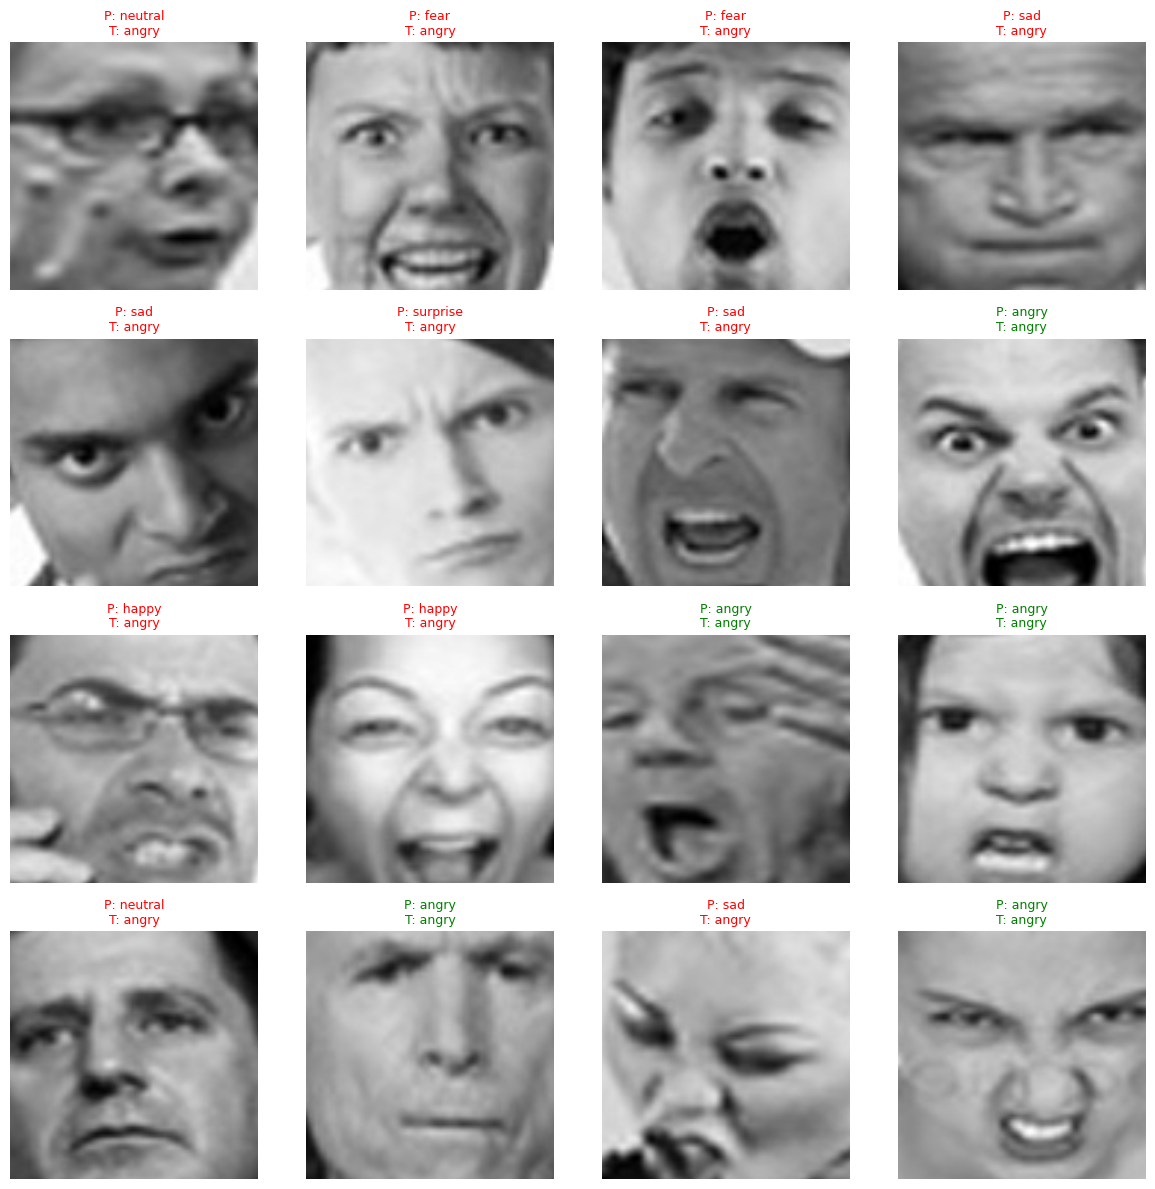

In [42]:
reusable_codes.visualize_predictions(
  model=model,
  dataloader=test_loader,
  class_names=class_names,
  device="cuda" if torch.cuda.is_available() else "cpu",
  num_images=16
)

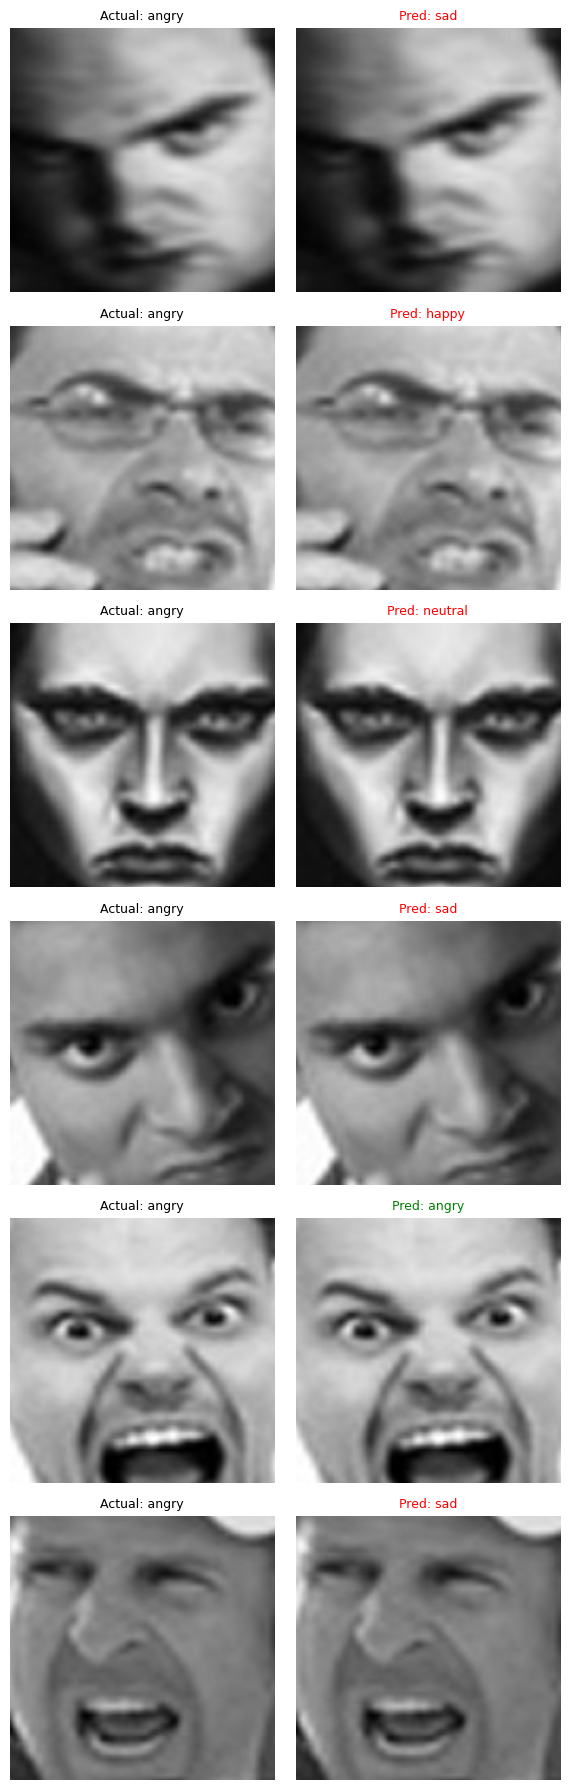

In [43]:
reusable_codes.vis_preds_side_by_side(
  model=model,
  dataloader=test_loader,
  class_names=class_names,
  device="cuda" if torch.cuda.is_available() else "cpu",
  num_images=6
)

## 4.3 Making Predictions on Custom Images

Here we demonstrate how to use the trained model to predict the emotion in a new image.

Top predictions: [('surprise', 0.5549323558807373), ('neutral', 0.15814775228500366), ('happy', 0.09789750725030899)]
Predicted emotion index: 6
Predicted emotion: surprise


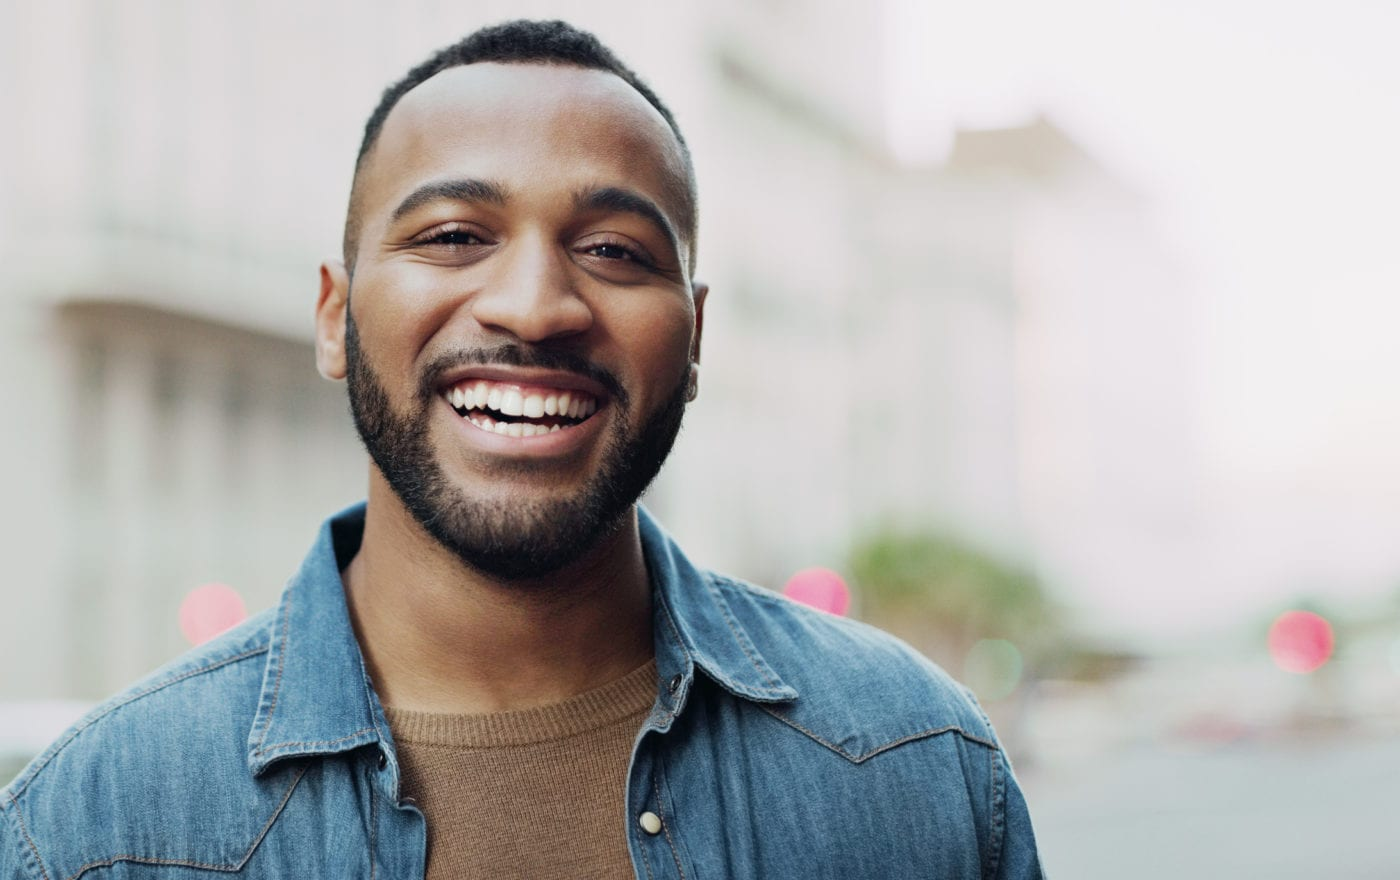

In [48]:
img_path = "https://www.allprodad.com/wp-content/uploads/2021/03/05-12-21-happy-people.jpg"
preds, pil_img = reusable_codes.predict_image(
  model=model,
  image_path_or_url=img_path,
  class_names=class_names,
  device="cuda" if torch.cuda.is_available() else "cpu",
  top_k=3
)

print("Top predictions:", preds)
predicted_class_name = preds[0][0]
predicted_class_index = class_names.index(predicted_class_name)
print("Predicted emotion index:", predicted_class_index)
print("Predicted emotion:", class_names[predicted_class_index])
display(pil_img)

Top predictions: [('neutral', 0.3332767188549042), ('surprise', 0.18158791959285736), ('happy', 0.15549972653388977)]
Predicted emotion index: 4
Predicted emotion: neutral


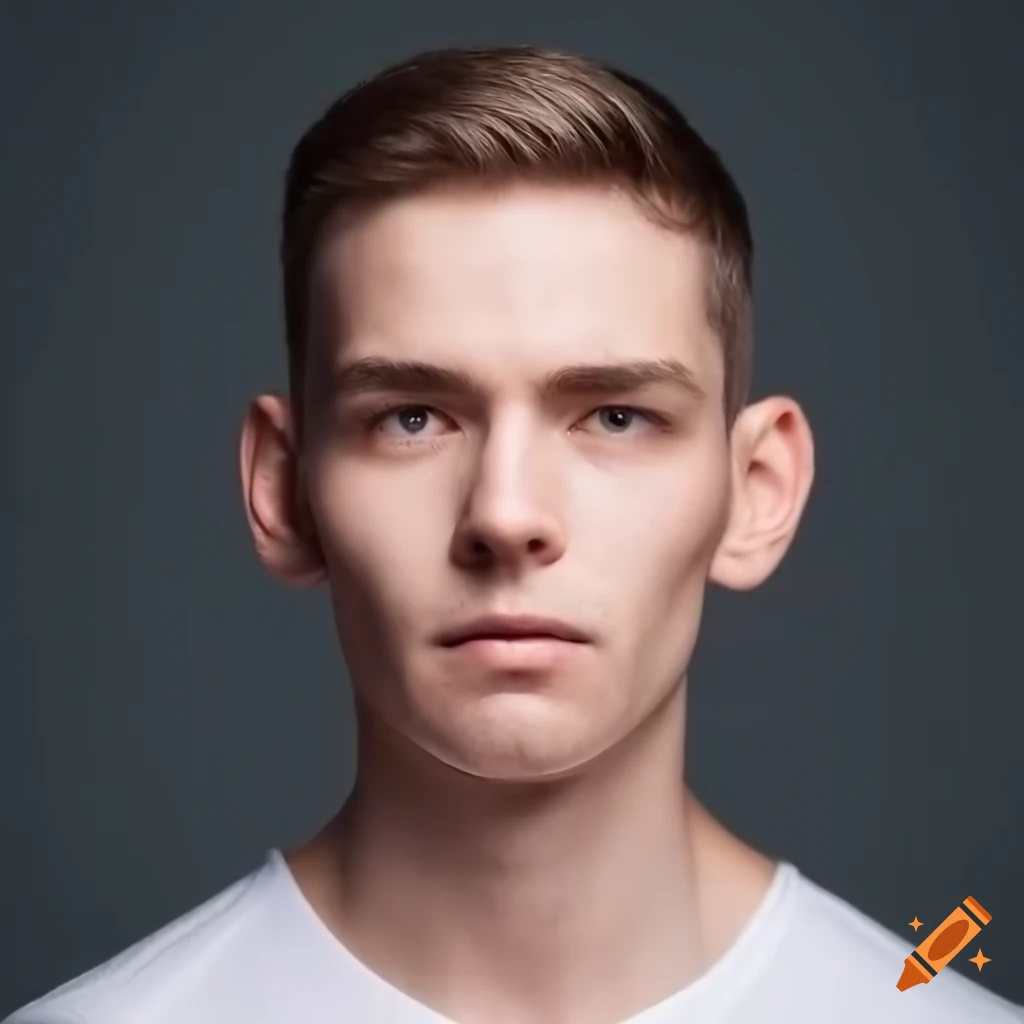

In [53]:
img_path = "https://pics.craiyon.com/2023-07-18/f4f3283682644c18bbb5c0293af35a2c.webp"
preds, pil_img = reusable_codes.predict_image(
  model=model,
  image_path_or_url=img_path,
  class_names=class_names,
  device="cuda" if torch.cuda.is_available() else "cpu",
  top_k=3
)

print("Top predictions:", preds)
predicted_class_name = preds[0][0]
predicted_class_index = class_names.index(predicted_class_name)
print("Predicted emotion index:", predicted_class_index)
print("Predicted emotion:", class_names[predicted_class_index])
display(pil_img)

Top predictions: [('happy', 0.3518976867198944), ('neutral', 0.21462810039520264), ('surprise', 0.20712082087993622)]
Predicted emotion index: 3
Predicted emotion: happy


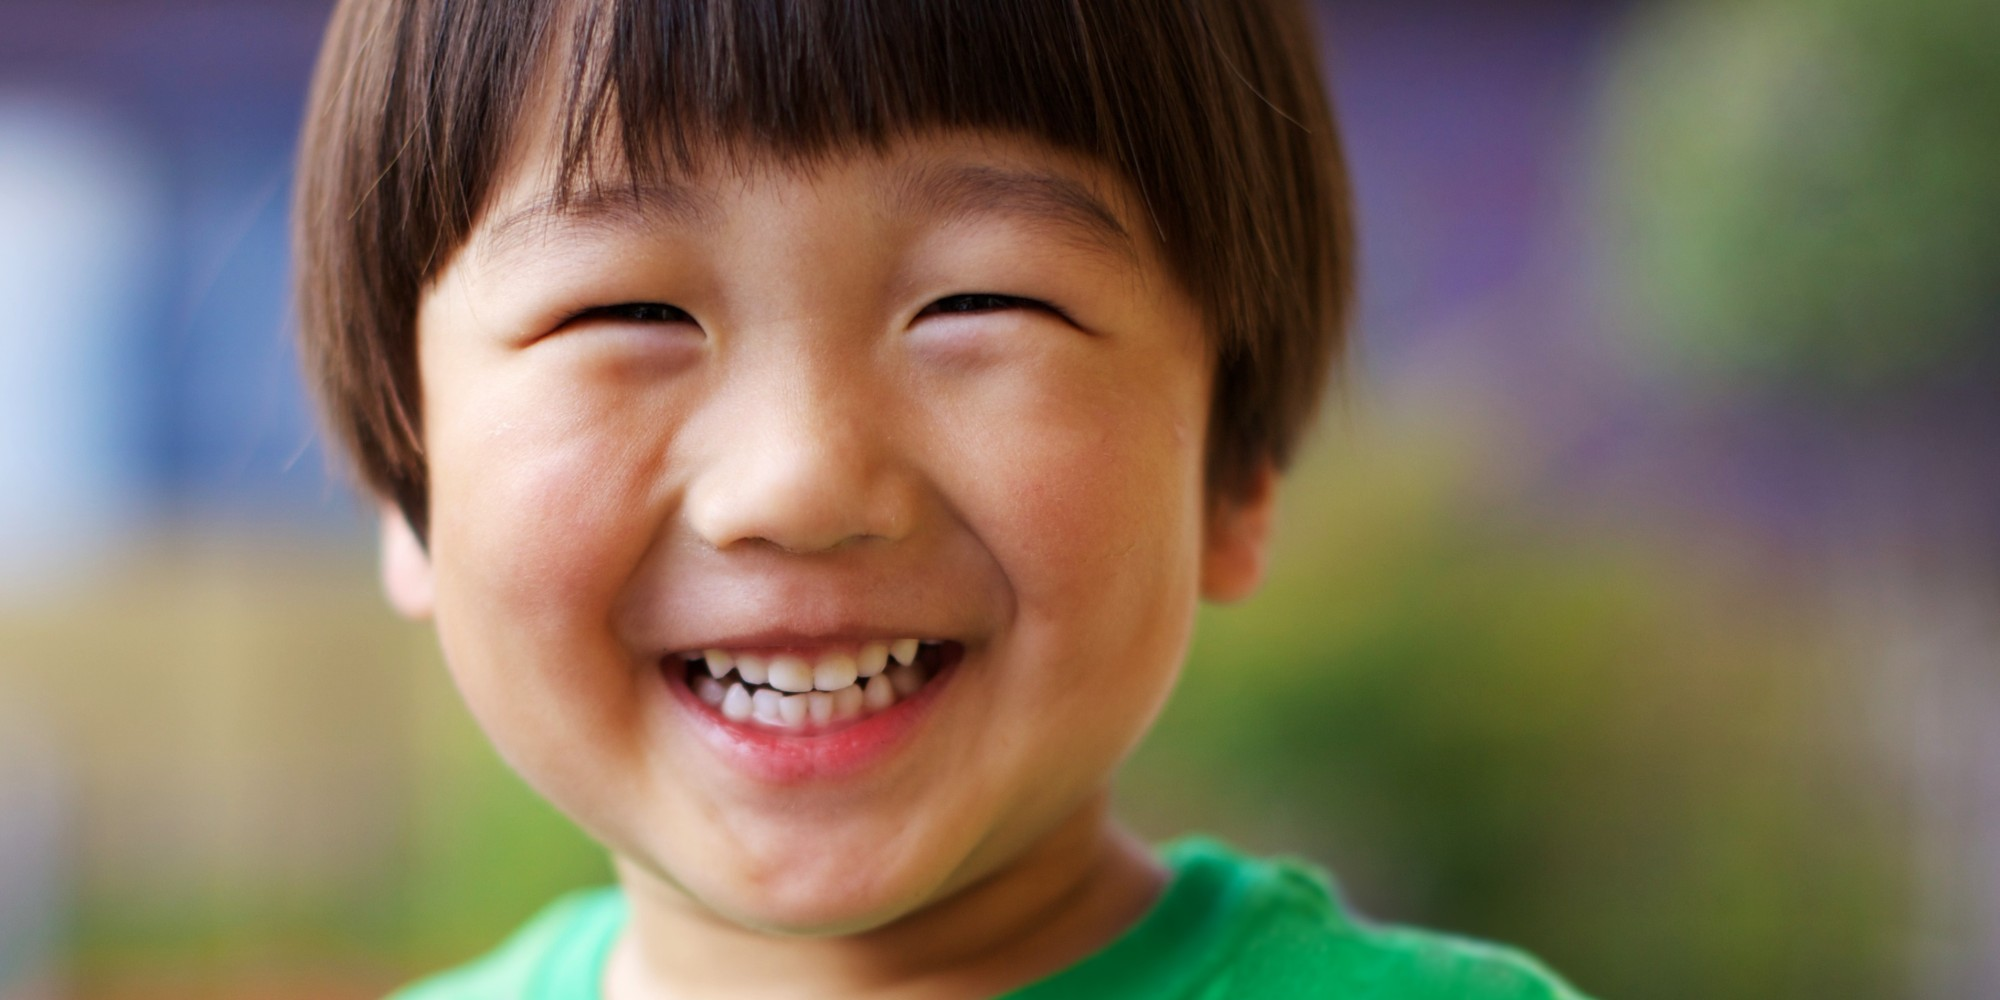

In [58]:
img_path = "https://s-i.huffpost.com/gen/1798588/images/o-HAPPY-CHILD-facebook.jpg"
preds, pil_img = reusable_codes.predict_image(
  model=model,
  image_path_or_url=img_path,
  class_names=class_names,
  device="cuda" if torch.cuda.is_available() else "cpu",
  top_k=3
)

print("Top predictions:", preds)
predicted_class_name = preds[0][0]
predicted_class_index = class_names.index(predicted_class_name)
print("Predicted emotion index:", predicted_class_index)
print("Predicted emotion:", class_names[predicted_class_index])
display(pil_img)

## 4.4 Model Evaluation Metrics

This subsection calculates and displays evaluation metrics like the confusion matrix and classification report.

In [49]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

all_preds = []
all_labels = []
all_probs = []

model.to(device)
model.eval()
with torch.no_grad():
  for X, y in test_loader:
    X = X.to(device)
    logits = model(X)
    probs = torch.softmax(logits, dim=1).cpu().numpy()
    preds = logits.argmax(dim=1).cpu().numpy()
    all_probs.append(probs)
    all_preds.append(preds)
    all_labels.append(y.numpy())

all_probs = np.vstack(all_probs)
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

cm = confusion_matrix(all_labels, all_preds)
print("Confusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(all_labels, all_preds, target_names=class_names))

Confusion matrix:
 [[ 183  243  111  442  210  189  102]
 [  11 1090   75  156   58   34   56]
 [  79  276  237  293  161  150  284]
 [  42   26   46 2308  212  115  101]
 [  43   35   57  759  819  189  140]
 [  70   36   68  637  328  420   75]
 [  21  167   95  223  129   37  808]]

Classification report:
               precision    recall  f1-score   support

       angry       0.41      0.12      0.19      1480
     disgust       0.58      0.74      0.65      1480
        fear       0.34      0.16      0.22      1480
       happy       0.48      0.81      0.60      2850
     neutral       0.43      0.40      0.41      2042
         sad       0.37      0.26      0.30      1634
    surprise       0.52      0.55      0.53      1480

    accuracy                           0.47     12446
   macro avg       0.45      0.43      0.42     12446
weighted avg       0.45      0.47      0.43     12446



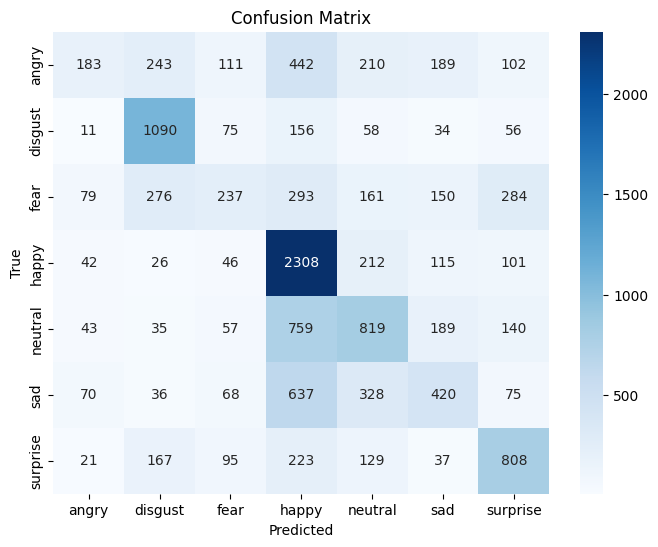

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(labels, preds, class_names):

  cm = confusion_matrix(labels, preds)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

plot_confusion_matrix(all_labels, all_preds, class_names)